In [1]:
import nltk
import pandas as pd
import pickle

pd.set_option("display.max_columns", None)
from collections import Counter
import spacy
import google_conf
import math
import matplotlib
import matplotlib.pyplot as plt
import json

In [2]:
mops_data = google_conf.setup(
    sheet_url="https://docs.google.com/spreadsheets/d/1VbCIAJssHKV9hlRTwzVFfm40CGnHesq53KXjv2qy4OM/edit?usp=sharing",
    service_account_path="../../ServiceAccountsKey.json")

In [3]:
metadata_df = pd.read_json("../data/metadata_rich_df.json")

In [4]:
article_id = 1203  # id for "Paul the Cosmopolitan?"
with open("../data/large_files/unigrams_lemmatized/unigrams_lemmata_id_{}.txt".format(str(article_id)), "r") as f:
    unigrams_lemmata = [el.strip() for el in f.readlines()]

In [5]:
nltk.FreqDist(unigrams_lemmata).most_common(10)

[('cosmopolitan', 89),
 ('Paul', 78),
 ('cosmopolitanism', 71),
 ('cynic', 41),
 ('vision', 33),
 ('people', 33),
 ('social', 33),
 ('human', 31),
 ('new', 30),
 ('think', 29)]

In [6]:
ids = metadata_df[metadata_df["decade"]==1930]["id_kase"]

In [8]:
metadata_df["wordCount"].sum()

232665684

In [9]:
def freqs_from_ids(ids):
    metadata_subset = metadata_df[metadata_df["id_kase"].isin(ids)]
    wordcount = metadata_subset["wordCount"].sum()
    unigrams_lemmata = []
    for id in ids:
        with open("../data/large_files/unigrams_lemmatized/unigrams_lemmata_id_{}.txt".format(str(id)), "r") as f:
            unigrams_lemmata.extend([el.strip() for el in f.readlines()])
    unigrams_lemmata_counts = nltk.FreqDist(unigrams_lemmata)
    unigrams_lemmata_freqs = [(tup[0], tup[1] / wordcount) for tup in unigrams_lemmata_counts.most_common()]
    return unigrams_lemmata_counts, unigrams_lemmata_freqs, wordcount


In [10]:
ids = metadata_df[metadata_df["decade"]==1930]["id_kase"]
len(ids)

425

In [11]:
ids = metadata_df[metadata_df["decade"]==1930].sample(300, replace=True)["id_kase"]
unigrams_lemmata_counts, unigrams_lemmata_freqs, wordcount = freqs_from_ids(ids)
unigrams_lemmata_freqs[:20]


[('et', 0.0035875145100576645),
 ('new', 0.002330416545076738),
 ('letter', 0.0021983067636098027),
 ('man', 0.002118453740145344),
 ('make', 0.0019417202102717998),
 ('time', 0.001926454191080065),
 ('see', 0.001894160688943703),
 ('work', 0.0018407296217726314),
 ('write', 0.001722711550328836),
 ('church', 0.0016622346281461944),
 ('die', 0.0016046934788850405),
 ('give', 0.0015031157358015746),
 ('God', 0.001501354272048682),
 ('book', 0.0014901983349470298),
 ('christian', 0.0014643635332379403),
 ('ad', 0.0014079966931453813),
 ('life', 0.0014021251473024063),
 ('Paul', 0.0013780518093462093),
 ('say', 0.0013751160364247218),
 ('find', 0.001368070181413152)]

In [12]:
ids = metadata_df[metadata_df["decade"]==1990].sample(300, replace=True)["id_kase"]
unigrams_lemmata_counts, unigrams_lemmata_freqs, wordcount = freqs_from_ids(ids)
unigrams_lemmata_freqs[:20]

[('see', 0.0025572677055115357),
 ('new', 0.0022603019114885046),
 ('Paul', 0.001686168043043978),
 ('work', 0.0016742147029072017),
 ('God', 0.0016734676191486532),
 ('study', 0.0016193040466538865),
 ('christian', 0.0014751168812540249),
 ('make', 0.0014261828950690978),
 ('book', 0.0014048910079504653),
 ('group', 0.0013354122184054543),
 ('church', 0.001329062006457792),
 ('et', 0.0012177465264340645),
 ('university', 0.0012024313093838203),
 ('use', 0.001200563599987449),
 ('text', 0.0011124077164787252),
 ('history', 0.001094477706273561),
 ('John', 0.0010933570806357384),
 ('law', 0.0010563764345875874),
 ('selection', 0.0010066953646441117),
 ('press', 0.0010029599458513691)]

In [13]:
decades_sample_freqs = []
sample_size = 500
for decade in range(1900, 2020, 10):
    ids = metadata_df[metadata_df["decade"]==decade].sample(sample_size, replace=True)["id_kase"]
    unigrams_lemmata_counts, unigrams_lemmata_freqs, wordcount = freqs_from_ids(ids)
    decades_freqs_dict = dict(unigrams_lemmata_freqs)
    decades_sample_freqs.append({"decade" : decade, "freqs" : decades_freqs_dict})

In [14]:
decades_sample_freqs

[{'decade': 1900,
  'freqs': {'et': 0.004489996067865874,
   'new': 0.0035419886985658703,
   'man': 0.003458641772354489,
   'Jesus': 0.0033159804692074013,
   'see': 0.0031963290536646824,
   'book': 0.002985660749375793,
   'ii': 0.0029718548168131717,
   'der': 0.002911006447370507,
   'God': 0.0028808379280670007,
   'life': 0.002796468340184314,
   'make': 0.0027944230168417037,
   'die': 0.0027243706923572916,
   'Paul': 0.0026563636912154895,
   'Christ': 0.0024906925004640327,
   'testament': 0.0023475198664812923,
   'time': 0.0023459858739743344,
   'say': 0.002299966098765596,
   'work': 0.002281558188682101,
   'church': 0.00219054129993593,
   'give': 0.0021746900440306983,
   'study': 0.002092877110326275,
   'great': 0.0020141321616357678,
   'gospel': 0.0020018602215801044,
   'Mr': 0.001984986304003567,
   'christian': 0.001966578393920072,
   'find': 0.00191595664119046,
   'le': 0.0019113546636695862,
   'st': 0.0019062413553130597,
   'history': 0.00186431222678954

In [15]:
keyterms = ["Paul", "apostle", "saint", "social", "soul", "theology", "science", "group", "church", "community", "gender", "psychology", "sociology", "anthropology", "jewish"]
keywords_freqs = []
for decade_data in decades_sample_freqs:
    decade_vals = {}
    for word in keyterms:
        try:
            decade_vals[word] = decade_data["freqs"][word]
        except:
            decade_vals[word] = 0
    keywords_freqs.append(decade_vals)

In [16]:
keywords_freqs

[{'Paul': 0.0026563636912154895,
  'apostle': 0.000716885831585008,
  'saint': 0.0005670658967387831,
  'social': 0.000365601547491641,
  'soul': 0.0005624639192179093,
  'theology': 0.0007388730575180717,
  'science': 0.000685183319774544,
  'group': 0.00017180716077928865,
  'church': 0.00219054129993593,
  'community': 0.00015237658902448814,
  'gender': 2.045323342610579e-06,
  'psychology': 8.999422707486548e-05,
  'sociology': 4.039513601655894e-05,
  'anthropology': 3.0679850139158686e-06,
  'jewish': 0.0007480770125598193},
 {'Paul': 0.0036115617340232798,
  'apostle': 0.0009378219322447336,
  'saint': 0.0003818782489254124,
  'social': 0.0006115972575813193,
  'soul': 0.0004280588743768576,
  'theology': 0.000898746018401203,
  'science': 0.00045825389871049485,
  'group': 0.00021610164474073724,
  'church': 0.0032498135013202924,
  'community': 0.00040496856165113496,
  'gender': 4.144415104616878e-06,
  'psychology': 0.00011012302992267705,
  'sociology': 9.413742880486909e-

In [17]:
keywords_freqs_df = pd.DataFrame(keywords_freqs, index=range(1900, 2020, 10))
keywords_freqs_df

,Paul,apostle,saint,social,soul,theology,science,group,church,community,gender,psychology,sociology,anthropology,jewish
1900,0.002656,0.000717,0.000567,0.000366,0.000562,0.000739,0.000685,0.000172,0.002191,0.000152,0.000002,0.000090,0.000040,0.000003,0.000748
1910,0.003612,0.000938,0.000382,0.000612,0.000428,0.000899,0.000458,0.000216,0.003250,0.000405,0.000004,0.000110,0.000094,0.000012,0.000660
1920,0.002380,0.000303,0.000432,0.000812,0.000311,0.000675,0.001053,0.000535,0.001955,0.000317,0.000006,0.000184,0.000048,0.000029,0.000422
1930,0.001949,0.000277,0.000428,0.000866,0.000377,0.000413,0.000411,0.000510,0.002335,0.000282,0.000002,0.000158,0.000021,0.000032,0.000563
1940,0.002679,0.000394,0.000465,0.000537,0.000342,0.000428,0.000206,0.000566,0.002682,0.000320,0.000005,0.000061,0.000029,0.000017,0.000621
1950,0.001725,0.000303,0.000259,0.000370,0.000295,0.000552,0.000235,0.000334,0.002189,0.000309,0.000001,0.000062,0.000023,0.000031,0.000297
1960,0.001954,0.000271,0.000365,0.000387,0.000192,0.000608,0.000205,0.000347,0.002303,0.000288,0.000001,0.000086,0.000050,0.000037,0.000449
1970,0.002474,0.000230,0.000316,0.000467,0.000269,0.000735,0.000148,0.000401,0.002438,0.000375,0.000005,0.000036,0.000046,0.000024,0.000572
1980,0.002138,0.000263,0.000287,0.000847,0.000179,0.000968,0.000256,0.000351,0.002040,0.000565,0.000022,0.000087,0.000083,0.000051,0.000667
1990,0.002019,0.000175,0.000198,0.000996,0.000143,0.000907,0.000723,0.001077,0.001525,0.000607,0.000144,0.000103,0.000071,0.000071,0.000651


In [18]:
"Paul", "church",

('Paul', 'church')

<Axes: >

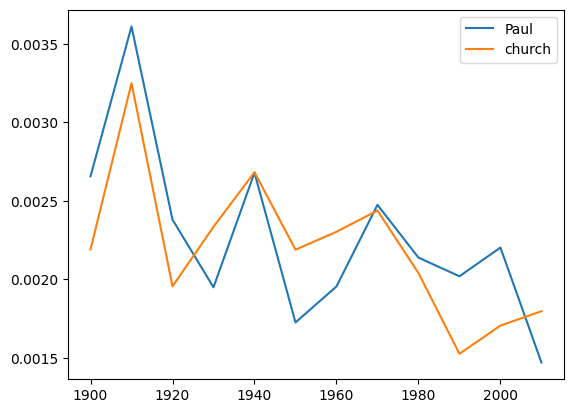

In [19]:
keywords_freqs_df[["Paul", "church"]].plot()

<Axes: >

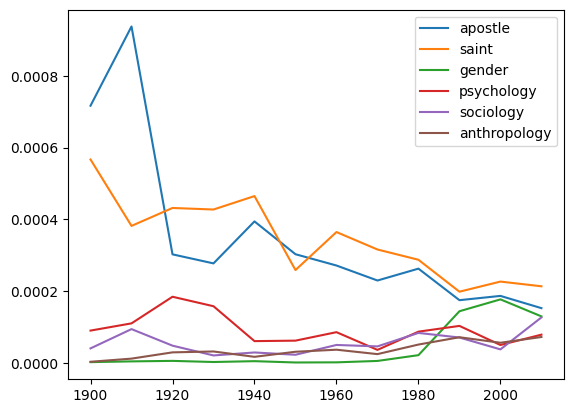

In [20]:
keywords_freqs_df[["apostle", "saint", "gender", "psychology", "sociology", "anthropology"]].plot()

In [21]:
keywords_freqs_df[["group", "social", "community", "jewish", "history", "theology", "science", "soul", "apostle", "saint"]].plot()

KeyError: "['history'] not in index"

<Axes: >

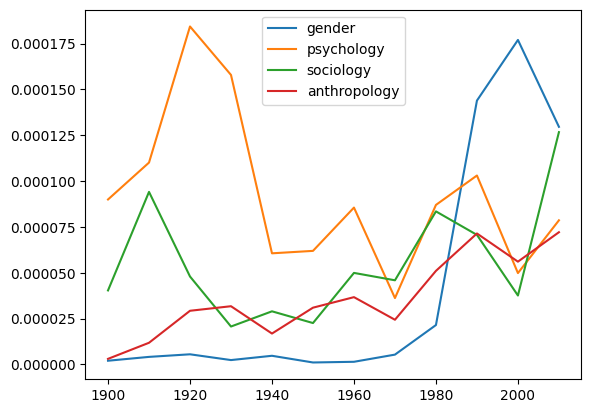

In [22]:
keywords_freqs_df[["gender", "psychology", "sociology", "anthropology"]].plot()

# Building vocabularies

In [23]:
bidecades = [(1900,1919), (1920,1939), (1940,1959), (1960,1979), (1980,1999), (2000,2019)]
N = 3000
bidecades_vocabs = []
for bidecade in bidecades:
    ids = metadata_df[metadata_df["year"].between(bidecade[0], bidecade[1])]["id_kase"]
    unigrams_lemmata_counts, unigrams_lemmata_freqs, wordcount = freqs_from_ids(ids)
    bidecade_vocab_N = [tup[0] for tup in unigrams_lemmata_counts.most_common()][:N]
    bidecades_vocabs.append(bidecade_vocab_N)

In [24]:
vocabulary = list(set([w for vocab in bidecades_vocabs for w in vocab]))
len(vocabulary)

4804

In [30]:
bidecades = [(1900,1919), (1920,1939), (1940,1959), (1960,1979), (1980,1999), (2000,2019)]
N = 3000
bidecades_vocabs_counts = []
for bidecade in bidecades:
    ids = metadata_df[metadata_df["year"].between(bidecade[0], bidecade[1])]["id_kase"]
    unigrams_lemmata_counts, unigrams_lemmata_freqs, wordcount = freqs_from_ids(ids)
    bidecade_vocab_N = dict(unigrams_lemmata_counts.most_common()[:N])
    bidecades_vocabs_counts.append(bidecade_vocab_N)

In [31]:
bidecades_strs = sorted([el for el in list(set(metadata_df["bidecade"])) if el != None])
bidecades_vocabs_counts_df = pd.DataFrame(bidecades_vocabs_counts).T
bidecades_vocabs_counts_df.columns = bidecades_strs

In [32]:
bidecades_vocabs_counts_df.shape

(4804, 6)

In [33]:
bidecades_vocabs_counts_df.head(10)

,1900-1919,1920-1939,1940-1959,1960-1979,1980-1999,2000-2019
man,11218.0,8342.0,24108.0,39199.0,48435.0,100670.0
new,10183.0,10192.0,23469.0,42092.0,97421.0,293457.0
Jesus,9650.0,4911.0,12134.0,23416.0,49765.0,215687.0
et,9325.0,11818.0,20805.0,35969.0,49326.0,73464.0
God,9248.0,6276.0,26328.0,45751.0,99505.0,293240.0
Paul,8660.0,7217.0,19803.0,36061.0,100083.0,224979.0
make,8094.0,8035.0,18269.0,27811.0,63486.0,206015.0
church,8091.0,7319.0,23104.0,39397.0,74688.0,214495.0
life,7543.0,6423.0,15075.0,22026.0,49869.0,148808.0
see,7388.0,6783.0,18801.0,34552.0,97771.0,233655.0


In [147]:
len(bidecades_vocabs)

6

In [150]:
shared_vocabulary = list((set(bidecades_vocabs[0])
                          & set(bidecades_vocabs[1])
                          & set(bidecades_vocabs[2])
                          & set(bidecades_vocabs[3])
                          & set(bidecades_vocabs[4])
                          & set(bidecades_vocabs[5])))
len(shared_vocabulary)

1868

In [158]:
pickle.dump(bidecades_vocabs_counts_df, open("../data/bidecades_vocabs_counts_df.pickle", "wb"))
pickle.dump(vocabulary, open("../data/vocabulary.pickle", "wb"))
pickle.dump(shared_vocabulary, open("../data/shared_vocabulary.pickle", "wb"))
pickle.dump(bidecades_vocabs, open("../data/bidecades_vocabs.pickle", "wb"))